Collaborative coding using GitHub
===========

Alexandre Perera Luna, Mónica Rojas Martínez

December 15th 2023


# Goal

The objective of this assignment is to construct a project through collaborative coding, showcasing an Exploratory Data Analysis (EDA) and a classification. To facilitate your understanding of GitHub, we will utilize code snippets from previous exercises, allowing you to focus on the process without concerns about the final outcome. The current notebook will serve as the main function in the project, and each participant is required to develop additional components and integrate their contributions into the main branch.


## Requirements

In order to work with functions created in other jupyter notebooks you need to install the package `nbimporter` using a shell and the following command:

<font color='grey'>pip install nbimporter</font> 

`nbimporter` allows you to import jupyter notebooks as modules. Once intalled and imported, you can use a command like the following to import a function called *fibonacci* that is stored on a notebook *fibbo_func* in the same path as the present notebook:

<font color='green'>from</font> fibbo_func <font color='green'>import</font> fibbonaci  <font color='green'>as</font> fibbo



In [1]:
pip install nbimporter

Note: you may need to restart the kernel to use updated packages.


In [2]:
# nbimporter didn't work for me. Unfortunately, the chosen library shouldn't be used anymore.
# https://github.com/grst/nbimporter
# "Update 2019-06: I do not recommend anymore to use nbimporter."
# It also states that the correct approach is to create a file ".py" with the desired functions and import as normal functions.
# To be able to proceed and not waste time with this, a solution that I found is to run the required notebooks.
%run fibbo_func.ipynb
%run renamevars_func.ipynb
%run normalize_func.ipynb
%run scat_plt_func.ipynb
%run group_and_average.ipynb

In [3]:
## Import the necessary modules
import nbimporter
import pandas as pd
import matplotlib.pyplot as plt

# Import the functions that we have created
from normalize_func import normalize
from scat_plt_func import scat_plt
from renamevars_func import renamevars, analyzedf
from group_and_average import group_and_average

In [4]:
# Here is an example of invoking the Fibonacci function, whisch should be located in the same directory as the main:
from fibbo_func import fibbonaci as fibbo
fibbo(24)

46368

## Exercises
As an illustration of Git workflow, you will analyze the *Parkinson's* dataset, which has been previously examined in past assignments. Each team member has specific responsibilities that may be crucial for the progress of others. Make sure all of you organize your tasks accordingly. We've structured the analysis into modules to assist you in tracking your tasks, but feel free to deviate from it if you prefer.   
Please use Markdown cells for describing your workflow and expalining the findings of your work. 
Remember you need both, to modify this notebook and, to create additional functions outside. Your work will only be available for others when you modify and merge your changes.


In [5]:
# We will start by loading the parkinson dataset. The rest is up to you!
df = pd.read_csv('parkinsons.data', 
                 dtype = { # indicate categorical variables
                     'status': 'category'})
df.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### 1. Cleaning and tidying the dataset

In [6]:
# your code here
dict_names = {'MDVP:Fo(Hz)':'avFF',
              'MDVP:Fhi(Hz)':'maxFF', 
              'MDVP:Flo(Hz)':'minFF',
              'MDVP:Jitter(%)': 'percJitter',
              'MDVP:Jitter(Abs)':'absJitter' ,
              'MDVP:RAP': 'rap',
              'MDVP:PPQ': 'ppq',
              'Jitter:DDP': 'ddp',
              'MDVP:Shimmer' : 'lShimer',
              'MDVP:Shimmer(dB)': 'dbShimer',
              'Shimmer:APQ3':'apq3',
              'Shimmer:APQ5': 'apq5',
              'MDVP:APQ':'apq',
              'Shimmer:DDA':'dda'}
df = renamevars(df, dict_names)

In [7]:
analyzedf(df, 'status')

Shape: (195, 24)

 Column: name 
        count unique             top freq
status                                  
0         48     48  phon_R01_S07_1    1
1        147    147  phon_R01_S01_1    1 


 Column: avFF 
         count        mean        std      min       25%      50%      75%  \
status                                                                      
0        48.0  181.937771  52.731067  110.739  120.9475  198.996  229.077   
1       147.0  145.180762  32.348050   88.333  117.5720  145.174  170.071   

            max  
status           
0       260.105  
1       223.361   


 Column: maxFF 
         count        mean        std      min        25%       50%        75%  \
status                                                                          
0        48.0  223.636750  96.727067  113.597  139.41325  231.1615  251.23925   
1       147.0  188.441463  88.339180  102.145  133.77650  163.3350  207.16050   

            max  
status           
0       592.030  
1  

<b>How many observations do you have?</b>
The shape tells us 195 rows and 24 columns, with 2 columns being Name and Status, so 22 values to be analyzed.
We have Patients(147) and Controls(48)

<b>Are there apparent differences between controls and patients? </b>
Yes there are. We can cleary see difference on some, for example in the variable avFF, where in the describe for that column, all the values are higher for controls. 

<b>Is the variability comparable?</b>
Yes it is. For example in the variable minFF, we have a much higher std (variability) 181.25% higher for controls than for patients.  

<b>If you check the minimum and maximum values are there outliers? </b>
Yes there are. For example in the minFF we can clearly see that there are some results that if you get the mean and subtract or add the std, you will still have some values that are way bewound what would be expected.

<b>If so, what will you do with them?</b>
Depends on the analyzes but a approach could be to study the outliers individually on each column that we can identify the presence of those, and plot then into a box plot, to confirm the outliers. Depending on the analyses that we want to do, might be the case to remove those.

### 2. Basic EDA based on plots and descriptive statistics

In [8]:
# your code here


### 3. Aggregating and transforming variables in the dataset

In [9]:
# Adding the 'subject_id' variable based on the 'name' variable
df['subject_id'] = df.name.str[9:12]

# Adding the 'trial' variable based on the 'name' variable
df['trial'] = 't' + df.name.str[-1]

# Removing the 'name' variable
df = df.drop('name', axis=1)



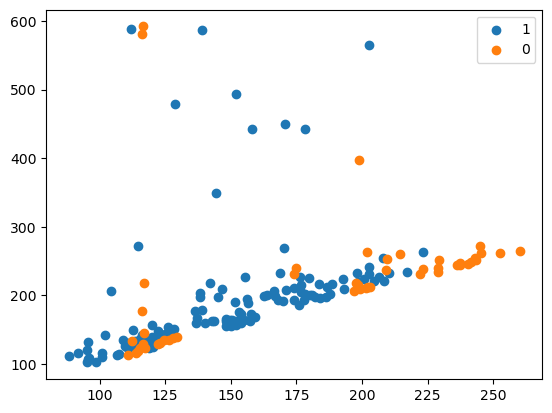

avFF maxFF


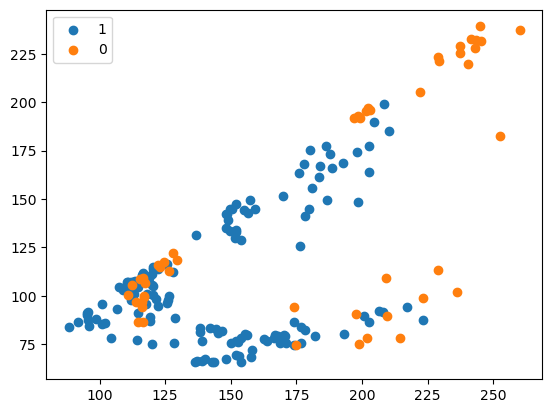

avFF minFF


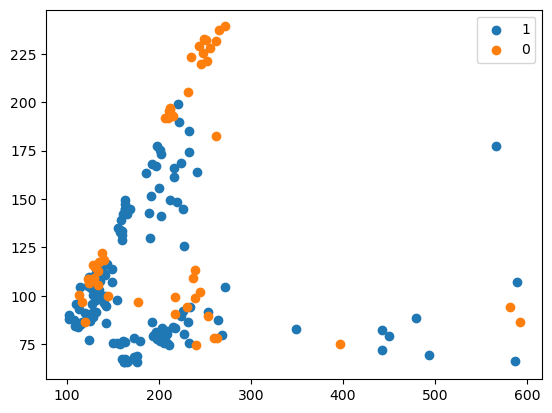

maxFF minFF
           avFF     maxFF     minFF
avFF   1.000000  0.400985  0.596546
maxFF  0.400985  1.000000  0.084951
minFF  0.596546  0.084951  1.000000


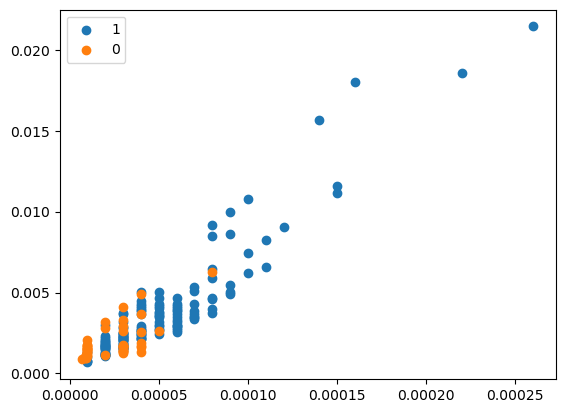

absJitter rap


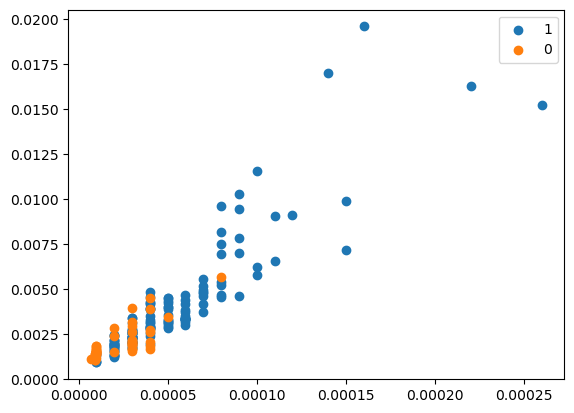

absJitter ppq


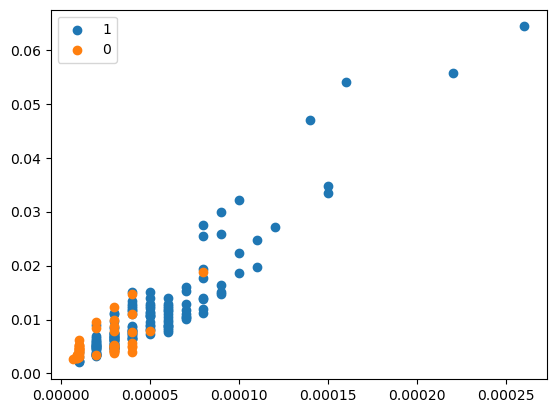

absJitter ddp


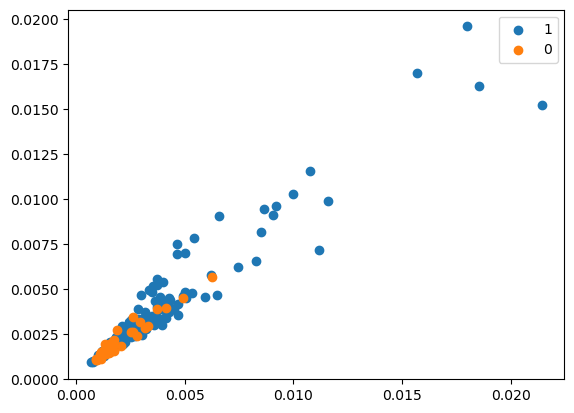

rap ppq


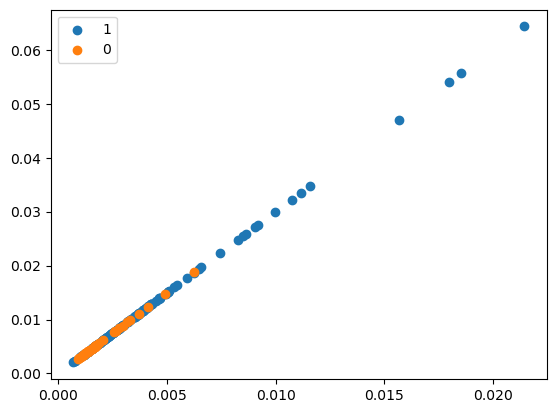

rap ddp


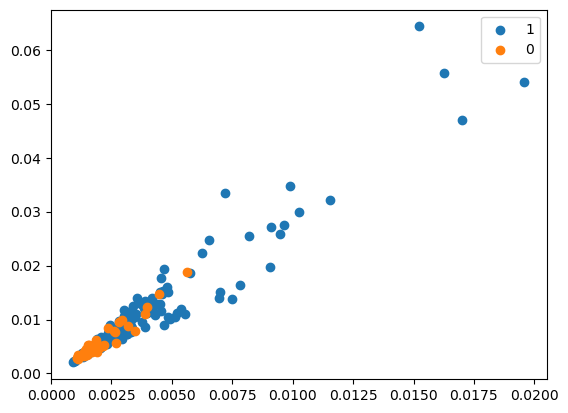

ppq ddp
           absJitter       rap       ppq       ddp
absJitter   1.000000  0.922911  0.897778  0.922913
rap         0.922911  1.000000  0.957317  1.000000
ppq         0.897778  0.957317  1.000000  0.957319
ddp         0.922913  1.000000  0.957319  1.000000


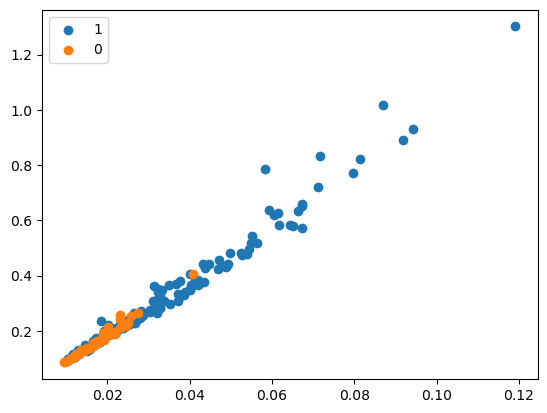

lShimer dbShimer


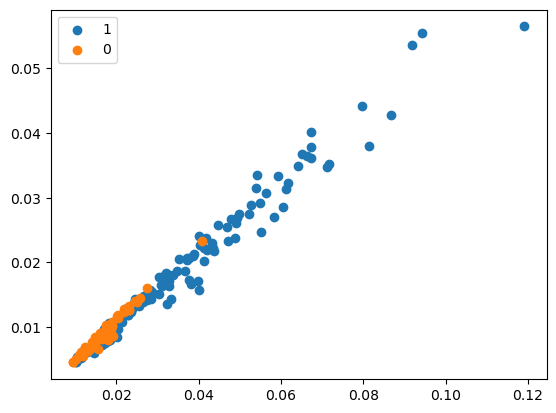

lShimer apq3


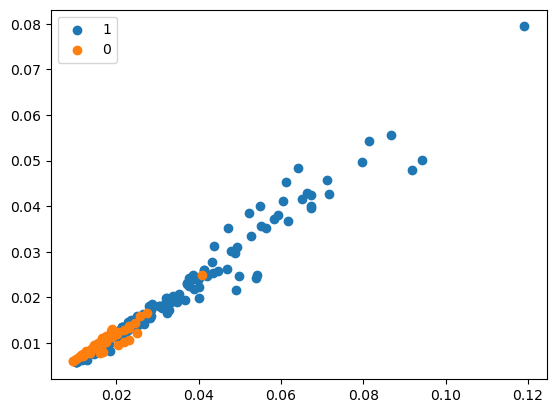

lShimer apq5


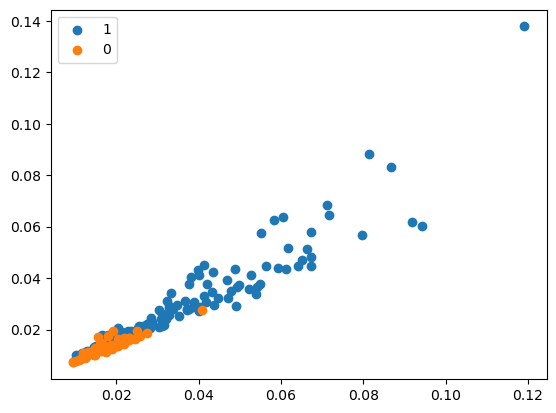

lShimer apq


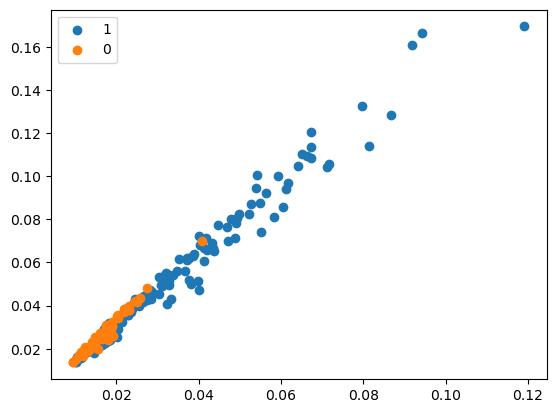

lShimer dda


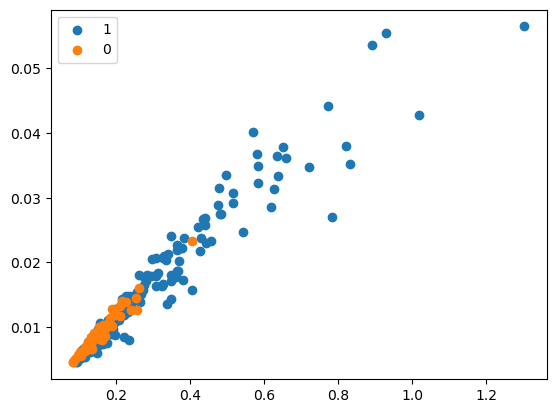

dbShimer apq3


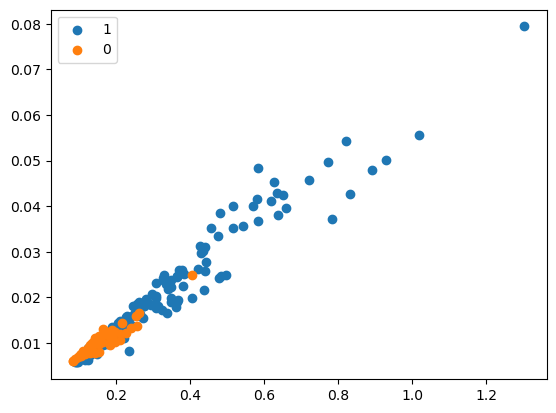

dbShimer apq5


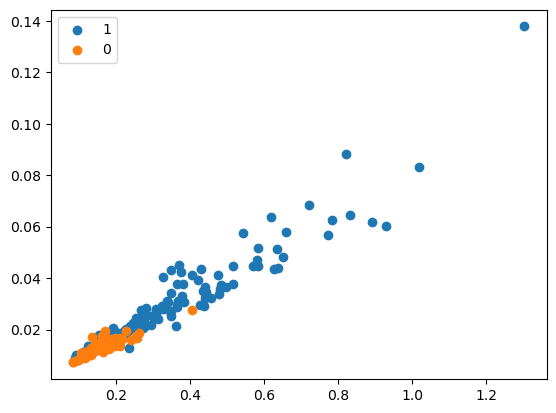

dbShimer apq


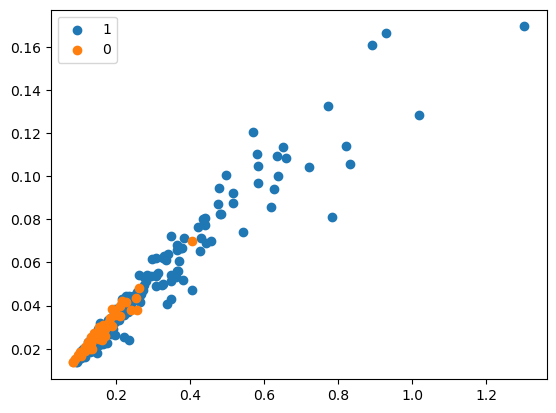

dbShimer dda


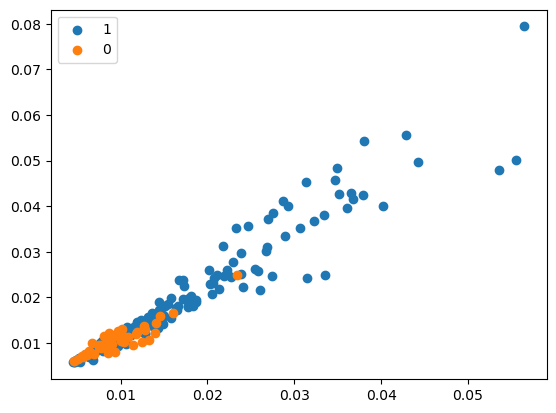

apq3 apq5


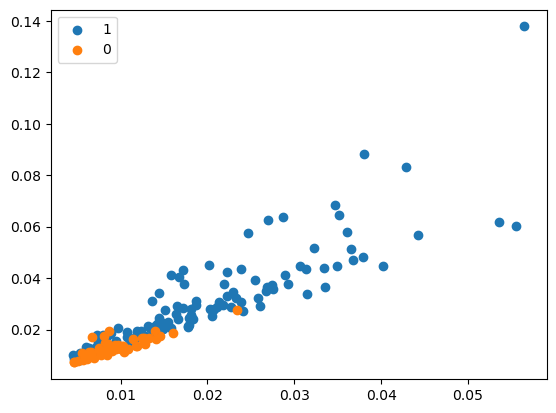

apq3 apq


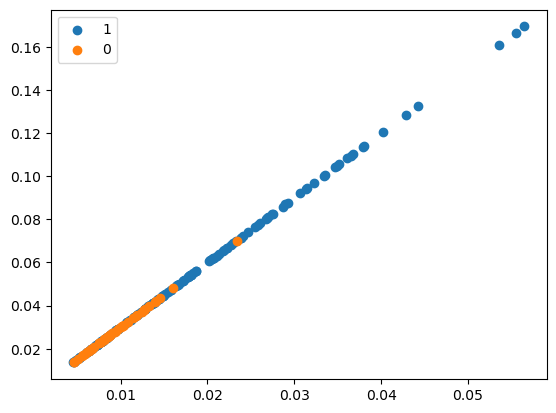

apq3 dda


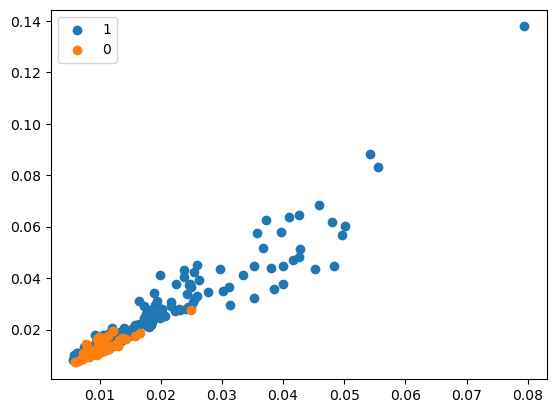

apq5 apq


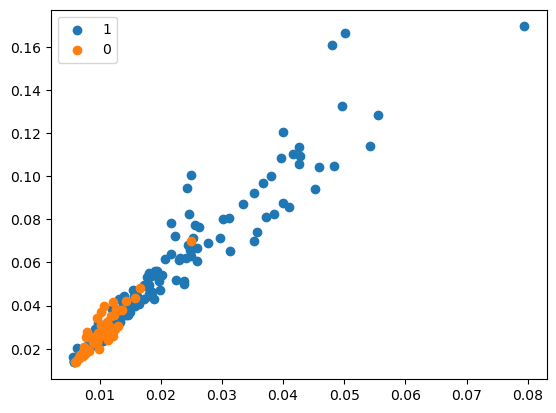

apq5 dda


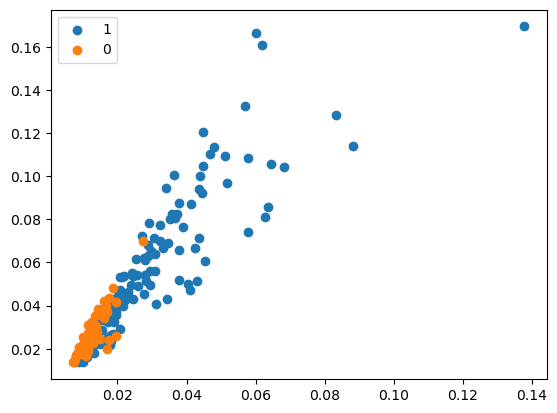

apq dda
           lShimer  dbShimer      apq3      apq5       apq       dda
lShimer   1.000000  0.987258  0.987625  0.982835  0.950083  0.987626
dbShimer  0.987258  1.000000  0.963198  0.973751  0.960977  0.963202
apq3      0.987625  0.963198  1.000000  0.960070  0.896645  1.000000
apq5      0.982835  0.973751  0.960070  1.000000  0.949146  0.960072
apq       0.950083  0.960977  0.896645  0.949146  1.000000  0.896647
dda       0.987626  0.963202  1.000000  0.960072  0.896647  1.000000


In [10]:
# Define variable sets
fund=['avFF','maxFF','minFF']
jitter=['absJitter', 'rap', 'ppq','ddp']
shimmer = ['lShimer', 'dbShimer', 'apq3', 'apq5', 'apq', 'dda']


# Scatter plots of Fundamental Frequency
for i, var in enumerate(fund):
    for j, var2 in enumerate(fund):
        if i < j:
            scat_plt(df[var], df[var2], df['status'])
            print(var,var2)
# Fundamental frequency correlation matrix
subset=df[fund]
corr_matrix=subset.corr()
print(corr_matrix)

# Scatter plots of Jitter
for i, var in enumerate(jitter):
    for j, var2 in enumerate(jitter):
        if i < j:
            scat_plt(df[var], df[var2], df['status'])
            print(var,var2)
# Jitter correlation matrix
subset=df[jitter]
corr_matrix=subset.corr()
print(corr_matrix)
        
# Scatter plots of Shimmer
for i, var in enumerate(shimmer):
    for j, var2 in enumerate(shimmer):
        if i < j:
            scat_plt(df[var], df[var2], df['status'])
            print(var,var2)
# Shimmer correlation matrix
subset=df[shimmer]
corr_matrix=subset.corr()
print(corr_matrix)


In [11]:
# Cleaned subset

cleaned_df = df.copy() # copy of the original dataset

# From the fundamental frequency there aren't correlated variables. The values of the correlation matrix are less than 0.59.

# From Jitter, all variables are correlated. Therfore, we only include one. 
cleaned_df.drop(['rap','absJitter','ddp'], axis =1, inplace = True) 


# From Shimmer, all variables are correlated, so we only keep a subset representative.
cleaned_df.drop(['dbShimer', 'apq3','apq5', 'apq', 'dda'], axis =1, inplace = True)

# Data set variables cleaned
cleaned_df.head()

,avFF,maxFF,minFF,percJitter,ppq,lShimer,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE,subject_id,trial
0,119.992,157.302,74.997,0.00784,0.00554,0.04374,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,S01,t1
1,122.400,148.650,113.819,0.00968,0.00696,0.06134,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,S01,t2
2,116.682,131.111,111.555,0.01050,0.00781,0.05233,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,S01,t3
3,116.676,137.871,111.366,0.00997,0.00698,0.05492,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,S01,t4
4,116.014,141.781,110.655,0.01284,0.00908,0.06425,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,S01,t5


In [12]:
cleaned_aggregate=group_and_average(cleaned_df, 'subject_id')

cleaned_aggregate.head()

,subject_id,avFF,maxFF,minFF,percJitter,ppq,lShimer,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,S01,118.719333,141.312833,106.029833,0.010085,0.007312,0.053932,0.016318,20.406667,1.0,0.428488,0.821314,-4.239926,0.296836,2.342642,0.353841
1,S02,99.770333,121.894333,95.413167,0.004585,0.002857,0.021668,0.008917,22.997333,1.0,0.598429,0.778017,-5.420414,0.308289,2.287428,0.234019
2,S04,147.346167,216.867500,87.532333,0.004347,0.002320,0.019343,0.013080,23.899667,1.0,0.521660,0.645843,-5.337281,0.249288,2.360638,0.232007
3,S05,159.837667,181.630167,86.767167,0.006247,0.003422,0.043337,0.025608,19.058667,1.0,0.626723,0.695886,-4.560947,0.278483,2.787869,0.310658
4,S06,150.644667,208.264333,78.278333,0.005230,0.002838,0.021367,0.014892,24.762000,1.0,0.432724,0.719675,-6.223537,0.228296,2.440360,0.164939


### 4. Differentiating between controls (healthy subjects) and patients

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [14]:
y = cleaned_aggregate['status']
X = cleaned_aggregate.drop(['subject_id','status'], axis=1) # drop all varibales that are not predicting variables

1) Cleaned and aggregated data

In [15]:
# Initialize the model with n = neighbors
knn = KNeighborsClassifier(n_neighbors=3)
Xn=X
knn.fit(Xn, y)
print ('The accuracy of the model is ' + str(knn.score(Xn,y)))

The accuracy of the model is 0.875


2. Cleaned,aggregated and z-score noramlized data

In [16]:
# Initialize the model with n = neighbors
knn = KNeighborsClassifier(n_neighbors=3)
Xn=normalize(X,0) # using z-score normalized
knn.fit(Xn, y)
print ('The accuracy of the model is ' + str(knn.score(Xn,y)))

The accuracy of the model is 0.875


3. Cleaned, aggregated, and z-score normalized using the min-max 

In [17]:
# Initialize the model with n = neighbors
knn = KNeighborsClassifier(n_neighbors=3)
Xn=normalize(X,1) # Using min-max
knn.fit(Xn, y)
print ('The accuracy of the model is ' + str(knn.score(Xn,y)))

The accuracy of the model is 0.875


Are there differences?

There are some differences in the accuracy of the model. In the case...